In [1]:
from pymongo import MongoClient
from bson.son import SON
from textblob import TextBlob
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

client = MongoClient("52.25.140.201",27017)
db = client['ProjectCorruption']
coll_parsed = db['Parsed_Articles']

list_df = []
total_recs = coll_parsed.find().count()
proc_recs = 0
for each in coll_parsed.find():
    source = each['source']
    title = each['title']
    date = each['date']
    t_words = each['total_wrds']
    conf_int = each['conf_interes']
    corrup = each['corrupcion']
    soborn = each['soborno']
    compra = each['compr_votos']
    cohech = each['cohecho']
    nepot = each['nepotismo']
    client = each['clientelismo']
    fraude = each['fraude']
    e_ilicit = each['enriq_ilicito']
    coima = each['coima']
    corrupta = each['corrupta']
    corrupto = each['corrupto']
    tot_keys = each['tot_keywords']
    international = each['international']

    texto = each['body']
    sent = TextBlob(texto).sentiment
    polarity = sent[0]
    subjectivity = sent[1]
    
    list_df.append([source,title,date,tot_keys,t_words,conf_int,corrup,soborn,compra,cohech,nepot,client,fraude,e_ilicit,\
                    coima, corrupta,corrupto,polarity,subjectivity,international])
    proc_recs += 1
    print "Processed: "+str(proc_recs)+" of "+str(total_recs)

Processed: 1 of 13550
Processed: 2 of 13550
Processed: 3 of 13550
Processed: 4 of 13550
Processed: 5 of 13550
Processed: 6 of 13550
Processed: 7 of 13550
Processed: 8 of 13550
Processed: 9 of 13550
Processed: 10 of 13550
Processed: 11 of 13550
Processed: 12 of 13550
Processed: 13 of 13550
Processed: 14 of 13550
Processed: 15 of 13550
Processed: 16 of 13550
Processed: 17 of 13550
Processed: 18 of 13550
Processed: 19 of 13550
Processed: 20 of 13550
Processed: 21 of 13550
Processed: 22 of 13550
Processed: 23 of 13550
Processed: 24 of 13550
Processed: 25 of 13550
Processed: 26 of 13550
Processed: 27 of 13550
Processed: 28 of 13550
Processed: 29 of 13550
Processed: 30 of 13550
Processed: 31 of 13550
Processed: 32 of 13550
Processed: 33 of 13550
Processed: 34 of 13550
Processed: 35 of 13550
Processed: 36 of 13550
Processed: 37 of 13550
Processed: 38 of 13550
Processed: 39 of 13550
Processed: 40 of 13550
Processed: 41 of 13550
Processed: 42 of 13550
Processed: 43 of 13550
Processed: 44 of 135

In [2]:
df = pd.DataFrame(list_df)

In [3]:
df.columns = ['source','title','date','total_keys','total_wrds','conf_interes','corrupcion',\
              'soborno','compr_votos','cohecho','nepotismo','clientelismo','fraude',\
              'enriq_ilicito','coima','corrupta','corrupto','polarity','subjectivity','international']

In [4]:
df.head()

,source,title,date,total_keys,total_wrds,conf_interes,corrupcion,soborno,compr_votos,cohecho,nepotismo,clientelismo,fraude,enriq_ilicito,coima,corrupta,corrupto,polarity,subjectivity,international
0,Pagina12,Cartes fue proclamado presidente electo de Par...,2013-05-10,0,1266,0,0,0,0,0,0,0,0,0,0,0,0,0.350000,0.628571,Y
1,LaNacion,What's News,2015-08-24,2,2403,0,1,1,0,0,0,0,0,0,0,0,0,0.216667,0.550000,Y
2,LaNacion,Cartas de los Lectores,2015-08-23,1,10714,0,1,0,0,0,0,0,0,0,0,0,0,0.041667,0.211111,Y
3,LaNacion,Misterio fantasmal,2015-08-23,0,2685,0,0,0,0,0,0,0,0,0,0,0,0,0.116667,0.183333,N
4,LaNacion,Petrobras podría enfrentar sanciones mayores a...,2015-08-18,4,2363,0,4,0,0,0,0,0,0,0,0,0,0,-0.050000,0.675000,N


In [ ]:
import pickle

output = open('data_corrupcion_since2012.pkl', 'wb')

pickle.dump(df, output)

output.close()

In [1]:
import pickle
pkl_file = open('data_corrupcion_since2012.pkl', 'rb')

data1 = pickle.load(pkl_file)

In [9]:
df = data1

In [5]:
print df.head()

     source                                              title       date  \
0  Pagina12  Cartes fue proclamado presidente electo de Par... 2013-05-10   
1  LaNacion                                        What's News 2015-08-24   
2  LaNacion                             Cartas de los Lectores 2015-08-23   
3  LaNacion                                 Misterio fantasmal 2015-08-23   
4  LaNacion  Petrobras podría enfrentar sanciones mayores a... 2015-08-18   

   total_keys  total_wrds  conf_interes  corrupcion  soborno  compr_votos  \
0           0        1266             0           0        0            0   
1           2        2403             0           1        1            0   
2           1       10714             0           1        0            0   
3           0        2685             0           0        0            0   
4           4        2363             0           4        0            0   

   cohecho  nepotismo  clientelismo  fraude  enriq_ilicito  coima  corrupt

In [6]:
from datetime import datetime

date_object = datetime.strptime('Jan 1 2012  1:00PM', '%b %d %Y %I:%M%p')

df = df[df.date >= date_object]

series_la_nacion = df[(df.source == 'LaNacion')]
series_clarin = df[(df.source == 'Clarin')]
series_pagina = df[(df.source == 'Pagina12')]
series_ta = df[(df.source == 'TA')]
series_perfil = df[(df.source == 'Perfil')]
series_ambito = df[(df.source == 'Ambito')]
series_infobae = df[(df.source == 'Infobae')]

print len(series_la_nacion)
print len(series_clarin)
print len(series_pagina)
print len(series_ta)
print len(series_perfil)
print len(series_ambito)
print len(series_infobae)

3306
701
4176
522
2790
427
1380


In [7]:
print type(series_la_nacion)

<class 'pandas.core.frame.DataFrame'>


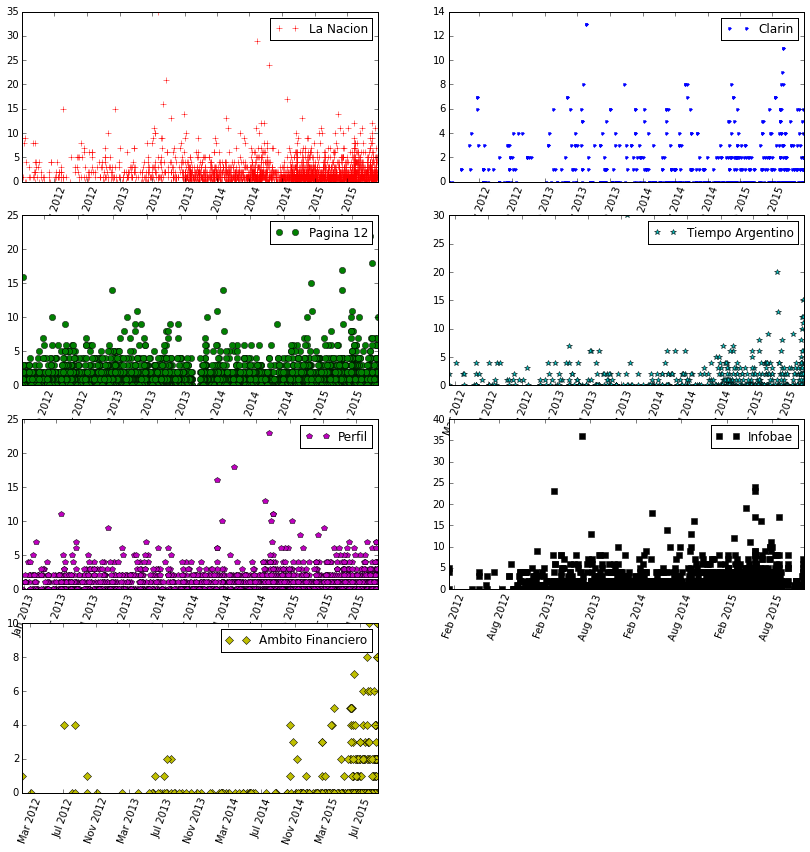

In [11]:
x1 = series_la_nacion['date']
y1 = series_la_nacion['total_keys']
x2 = series_clarin['date']
y2 = series_clarin['total_keys']
x3 = series_pagina['date']
y3 = series_pagina['total_keys']
x4 = series_ta['date']
y4 = series_ta['total_keys']
x5 = series_perfil['date']
y5 = series_perfil['total_keys']
x6 = series_infobae['date']
y6 = series_infobae['total_keys']
x7 = series_ambito['date']
y7 = series_ambito['total_keys']

fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(14,14))
ax8.set_visible(False)
plt.xlabel('Date')
plt.ylabel('Total Keywords')
plt.title('Analisis corrupcion')
#plt.xticks(rotation=90)

ax1.plot(x1, y1, marker='+', color='r', linestyle='None')
ax2.plot(x2, y2, marker='.', color='b', linestyle='None')
ax3.plot(x3, y3, marker='o', color='g', linestyle='None')
ax4.plot(x4, y4, marker='*', color='c', linestyle='None')
ax5.plot(x5, y5, marker='p', color='m', linestyle='None')
ax6.plot(x6, y6, marker='s', color='k', linestyle='None')
ax7.plot(x7, y7, marker='D', color='y', linestyle='None')

ax1.legend(['La Nacion'])
ax2.legend(['Clarin'])
ax3.legend(['Pagina 12'])
ax4.legend(['Tiempo Argentino'])
ax5.legend(['Perfil'])
ax6.legend(['Infobae'])
ax7.legend(['Ambito Financiero'])

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=70 )
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=70 )
plt.setp( ax3.xaxis.get_majorticklabels(), rotation=70 )
plt.setp( ax4.xaxis.get_majorticklabels(), rotation=70 )
plt.setp( ax5.xaxis.get_majorticklabels(), rotation=70 )
plt.setp( ax6.xaxis.get_majorticklabels(), rotation=70 )
plt.setp( ax7.xaxis.get_majorticklabels(), rotation=70 )



plt.show()

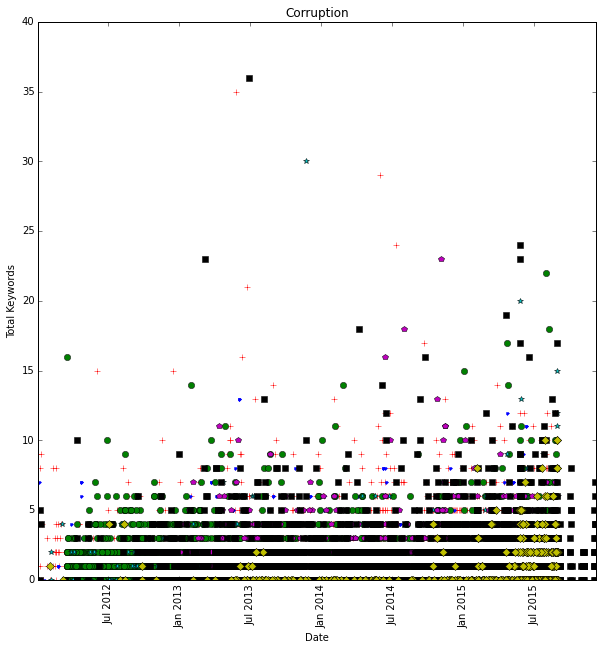

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

x1 = series_la_nacion['date']
y1 = series_la_nacion['total_keys']
x2 = series_clarin['date']
y2 = series_clarin['total_keys']
x3 = series_pagina['date']
y3 = series_pagina['total_keys']
x4 = series_ta['date']
y4 = series_ta['total_keys']
x5 = series_perfil['date']
y5 = series_perfil['total_keys']
x6 = series_infobae['date']
y6 = series_infobae['total_keys']
x7 = series_ambito['date']
y7 = series_ambito['total_keys']

plt.xlabel('Date')
plt.ylabel('Total Keywords')
plt.title('Corruption')

ax.plot(x1, y1, marker='+', color='r', linestyle='None')
ax.plot(x2, y2, marker='.', color='b', linestyle='None')
ax.plot(x3, y3, marker='o', color='g', linestyle='None')
ax.plot(x4, y4, marker='*', color='c', linestyle='None')
ax.plot(x5, y5, marker='p', color='m', linestyle='None')
ax.plot(x6, y6, marker='s', color='k', linestyle='None')
ax.plot(x7, y7, marker='D', color='y', linestyle='None')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from datetime import datetime

date_object = datetime.strptime('Jun 1 2000  1:33PM', '%b %d %Y %I:%M%p')
x = series_ambito['date']
x2 = x[series_ambito.date >= date_object]
y = series_ambito['total_keys']

print len(x2)
print len(y)

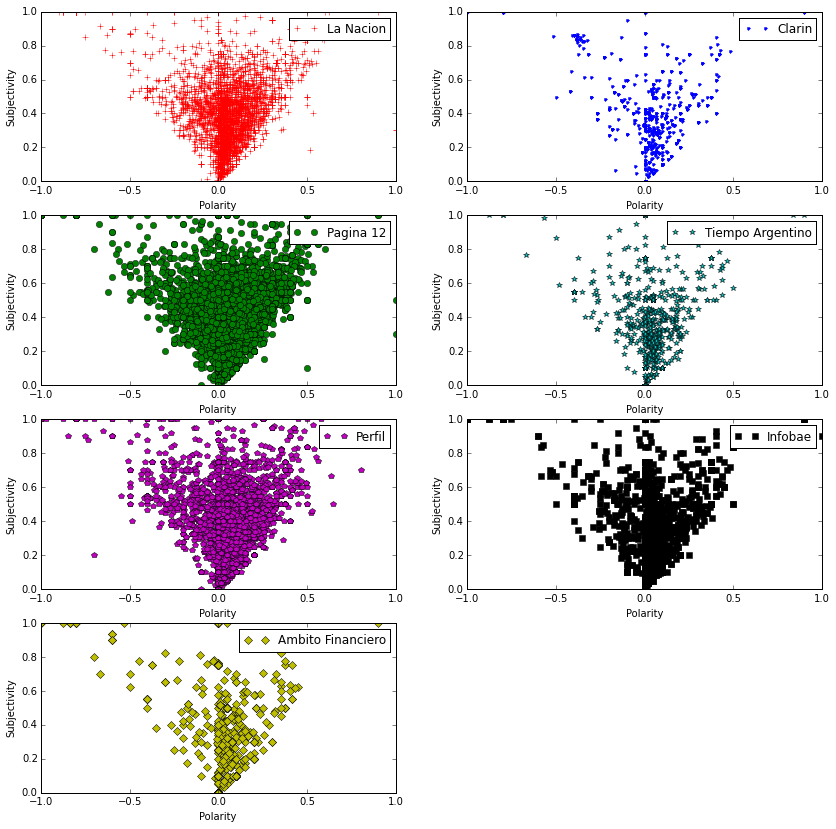

In [15]:
x1 = series_la_nacion['polarity']
y1 = series_la_nacion['subjectivity']
x2 = series_clarin['polarity']
y2 = series_clarin['subjectivity']
x3 = series_pagina['polarity']
y3 = series_pagina['subjectivity']
x4 = series_ta['polarity']
y4 = series_ta['subjectivity']
x5 = series_perfil['polarity']
y5 = series_perfil['subjectivity']
x6 = series_infobae['polarity']
y6 = series_infobae['subjectivity']
x7 = series_ambito['polarity']
y7 = series_ambito['subjectivity']

fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(14,14))

ax8.set_visible(False)

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.xticks(rotation='vertical')

ax1.set_xlabel('Polarity')
ax2.set_xlabel('Polarity')
ax3.set_xlabel('Polarity')
ax4.set_xlabel('Polarity')
ax5.set_xlabel('Polarity')
ax6.set_xlabel('Polarity')
ax7.set_xlabel('Polarity')

ax1.set_ylabel('Subjectivity')
ax2.set_ylabel('Subjectivity')
ax3.set_ylabel('Subjectivity')
ax4.set_ylabel('Subjectivity')
ax5.set_ylabel('Subjectivity')
ax6.set_ylabel('Subjectivity')
ax7.set_ylabel('Subjectivity')

#    ax.set_title('Title', fontsize=random.choice(fontsizes))

ax1.plot(x1, y1, marker='+', color='r', linestyle='None', label='La Nacion')
ax2.plot(x2, y2, marker='.', color='b', linestyle='None', label='Clarin')
ax3.plot(x3, y3, marker='o', color='g', linestyle='None', label='Pagina 12')
ax4.plot(x4, y4, marker='*', color='c', linestyle='None', label='Tiempo Argentino')
ax5.plot(x5, y5, marker='p', color='m', linestyle='None', label='Perfil')
ax6.plot(x6, y6, marker='s', color='k', linestyle='None', label='Infobae')
ax7.plot(x7, y7, marker='D', color='y', linestyle='None', label='Ambito Financiero')

ax1.legend(['La Nacion'])
ax2.legend(['Clarin'])
ax3.legend(['Pagina 12'])
ax4.legend(['Tiempo Argentino'])
ax5.legend(['Perfil'])
ax6.legend(['Infobae'])
ax7.legend(['Ambito Financiero'])


plt.show()

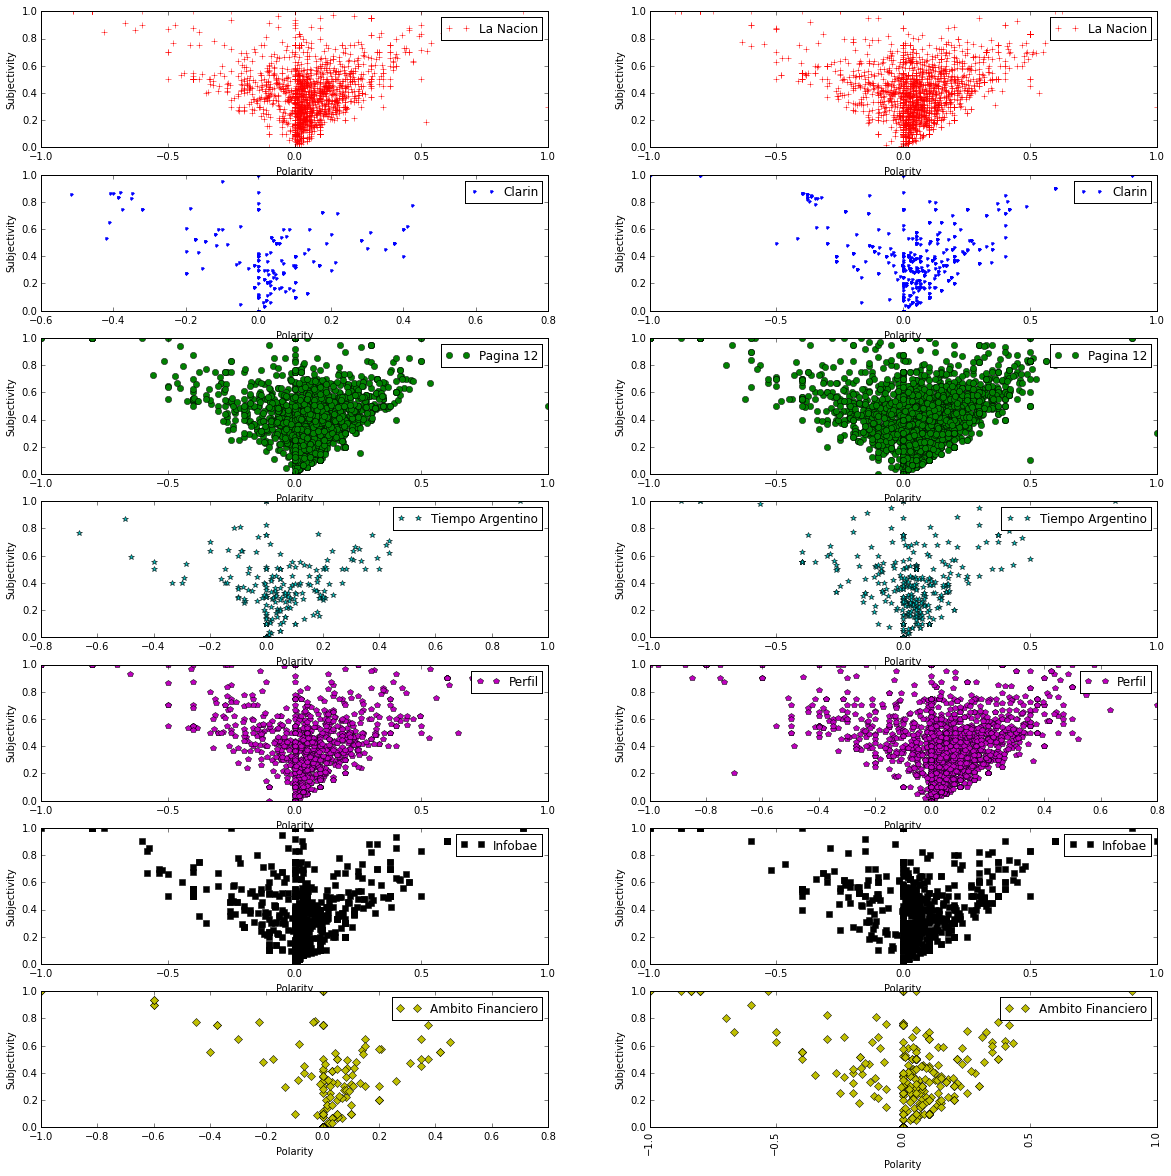

In [16]:
x01 = series_la_nacion['polarity'][(series_la_nacion.international == "Y")]
y01 = series_la_nacion['subjectivity'][(series_la_nacion.international == "Y")]
x10 = series_la_nacion['polarity'][(series_la_nacion.international != "Y")]
y10 = series_la_nacion['subjectivity'][(series_la_nacion.international != "Y")]

x02 = series_clarin['polarity'][(series_clarin.international == "Y")]
y02 = series_clarin['subjectivity'][(series_clarin.international == "Y")]
x20 = series_clarin['polarity'][(series_clarin.international != "Y")]
y20 = series_clarin['subjectivity'][(series_clarin.international != "Y")]

x03 = series_pagina['polarity'][(series_pagina.international == "Y")]
y03 = series_pagina['subjectivity'][(series_pagina.international == "Y")]
x30 = series_pagina['polarity'][(series_pagina.international != "Y")]
y30 = series_pagina['subjectivity'][(series_pagina.international != "Y")]

x04 = series_ta['polarity'][(series_ta.international == "Y")]
y04 = series_ta['subjectivity'][(series_ta.international == "Y")]
x40 = series_ta['polarity'][(series_ta.international != "Y")]
y40 = series_ta['subjectivity'][(series_ta.international != "Y")]

x05 = series_perfil['polarity'][(series_perfil.international == "Y")]
y05 = series_perfil['subjectivity'][(series_perfil.international == "Y")]
x50 = series_perfil['polarity'][(series_perfil.international != "Y")]
y50 = series_perfil['subjectivity'][(series_perfil.international != "Y")]

x06 = series_infobae['polarity'][(series_infobae.international == "Y")]
y06 = series_infobae['subjectivity'][(series_infobae.international == "Y")]
x60 = series_infobae['polarity'][(series_infobae.international != "Y")]
y60 = series_infobae['subjectivity'][(series_infobae.international != "Y")]

x07 = series_ambito['polarity'][(series_ambito.international == "Y")]
y07 = series_ambito['subjectivity'][(series_ambito.international == "Y")]
x70 = series_ambito['polarity'][(series_ambito.international != "Y")]
y70 = series_ambito['subjectivity'][(series_ambito.international != "Y")]

fig, ((ax01, ax10), (ax02, ax20), (ax03,ax30), (ax04,ax40), (ax05,ax50), \
      (ax06,ax60), (ax07,ax70)) = plt.subplots(nrows=7, ncols=2, figsize=(20,20))

ax8.set_visible(False)

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.xticks(rotation='vertical')

ax01.set_xlabel('Polarity')
ax02.set_xlabel('Polarity')
ax03.set_xlabel('Polarity')
ax04.set_xlabel('Polarity')
ax05.set_xlabel('Polarity')
ax06.set_xlabel('Polarity')
ax07.set_xlabel('Polarity')
ax10.set_xlabel('Polarity')
ax20.set_xlabel('Polarity')
ax30.set_xlabel('Polarity')
ax40.set_xlabel('Polarity')
ax50.set_xlabel('Polarity')
ax60.set_xlabel('Polarity')
ax70.set_xlabel('Polarity')

ax01.set_ylabel('Subjectivity')
ax02.set_ylabel('Subjectivity')
ax03.set_ylabel('Subjectivity')
ax04.set_ylabel('Subjectivity')
ax05.set_ylabel('Subjectivity')
ax06.set_ylabel('Subjectivity')
ax07.set_ylabel('Subjectivity')
ax10.set_ylabel('Subjectivity')
ax20.set_ylabel('Subjectivity')
ax30.set_ylabel('Subjectivity')
ax40.set_ylabel('Subjectivity')
ax50.set_ylabel('Subjectivity')
ax60.set_ylabel('Subjectivity')
ax70.set_ylabel('Subjectivity')

ax01.plot(x01, y01, marker='+', color='r', linestyle='None', label='La Nacion Intl')
ax10.plot(x10, y10, marker='+', color='r', linestyle='None', label='La Nacion Argentina')

ax02.plot(x02, y02, marker='.', color='b', linestyle='None', label='Clarin Intl')
ax20.plot(x20, y20, marker='.', color='b', linestyle='None', label='Clarin Argentina')

ax03.plot(x03, y03, marker='o', color='g', linestyle='None', label='Pagina 12 Intl')
ax30.plot(x30, y30, marker='o', color='g', linestyle='None', label='Pagina 12 Argentina')

ax04.plot(x04, y04, marker='*', color='c', linestyle='None', label='Tiempo Argentino Intl')
ax40.plot(x40, y40, marker='*', color='c', linestyle='None', label='Tiempo Argentino Argentina')

ax05.plot(x05, y05, marker='p', color='m', linestyle='None', label='Perfil Intl')
ax50.plot(x50, y50, marker='p', color='m', linestyle='None', label='Perfil Argentina')

ax06.plot(x06, y06, marker='s', color='k', linestyle='None', label='Infobae Intl')
ax60.plot(x60, y60, marker='s', color='k', linestyle='None', label='Infobae Argentina')

ax07.plot(x07, y07, marker='D', color='y', linestyle='None', label='Ambito Financiero Intl')
ax70.plot(x70, y70, marker='D', color='y', linestyle='None', label='Ambito Financiero Argentina')

ax01.legend(['La Nacion'])
ax02.legend(['Clarin'])
ax03.legend(['Pagina 12'])
ax04.legend(['Tiempo Argentino'])
ax05.legend(['Perfil'])
ax06.legend(['Infobae'])
ax07.legend(['Ambito Financiero'])
ax10.legend(['La Nacion'])
ax20.legend(['Clarin'])
ax30.legend(['Pagina 12'])
ax40.legend(['Tiempo Argentino'])
ax50.legend(['Perfil'])
ax60.legend(['Infobae'])
ax70.legend(['Ambito Financiero'])

plt.show()

In [ ]:
countries = ['Afganistán','Albania','Alemania','Andorra','Angola','Anguila','Antigua y Barbuda',\
            'Antillas Neerlandesas','Antártida','Arabia Saudí','Argelia','Argentina','Armenia',\
            'Aruba','Australia','Austria','Azerbaiyán','Bahamas','Bahréin','Bangladesh',\
            'Barbados','Belice','Benín','Bermudas','Bielorrusia','Bolivia','Bosnia-Herzegovina',
            'Botsuana','Brasil','Brunéi','Bulgaria','Burundi','Bután','Bélgica','Cabo Verde',\
            'Camboya','Camerún','Canadá','Chad','Chile','China','Chipre','Ciudad del Vaticano',\
            'Colombia','Comoras','Congo','Corea del Norte','Corea del Sur','Costa Rica',\
            'Costa de Marfil','Croacia','Cuba','Dinamarca','Dominica','Ecuador','Egipto',\
            'El Salvador','Emiratos Árabes Unidos','Eritrea','Eslovaquia','Eslovenia','España',\
            'Estados Unidos','Estonia','Etiopía','Filipinas','Finlandia','Fiyi','Francia',\
            'Gabón','Gambia','Georgia','Ghana','Gibraltar','Granada','Grecia','Groenlandia',\
            'Guadalupe','Guam','Guatemala','Guayana Francesa','Guernsey','Guinea',\
            'Guinea Ecuatorial','Guinea-Bissau','Guyana','Haití','Honduras','Hungría','India',\
            'Indonesia','Iraq','Irlanda','Irán','Isla Bouvet','Isla Christmas','Isla Niue',\
            'Isla Norfolk','Isla de Man','Islandia','Islas Caimán','Islas Cocos','Islas Cook',\
            'Islas Feroe','Islas Georgia del Sur y Sandwich del Sur','Islas Heard y McDonald',\
            'Islas Malvinas','Islas Marianas del Norte','Islas Marshall','Islas Salomón',\
            'Islas Turcas y Caicos','Islas Vírgenes Británicas',\
            'Islas Vírgenes de los Estados Unidos',\
            'Islas menores alejadas de los Estados Unidos','Islas Åland','Israel','Italia',\
            'Jamaica','Japón','Jersey','Jordania','Kazajistán','Kenia','Kirguistán','Kiribati',\
            'Kuwait','Laos','Lesoto','Letonia','Liberia','Libia','Liechtenstein','Lituania',\
            'Luxemburgo','Líbano','Macedonia','Madagascar','Malasia','Malaui','Maldivas','Mali',\
            'Malta','Marruecos','Martinica','Mauricio','Mauritania','Mayotte','Micronesia',\
            'Moldavia','Mongolia','Montenegro','Montserrat','Mozambique','Myanmar','México',\
            'Mónaco','Namibia','Nauru','Nepal','Nicaragua','Nigeria','Noruega','Nueva Caledonia',\
            'Nueva Zelanda','Níger','Omán','Pakistán','Palau','Palestina','Panamá',\
            'Papúa Nueva Guinea','Paraguay','Países Bajos','Perú','Pitcairn','Polinesia Francesa',\
            'Polonia','Portugal','Puerto Rico','Qatar',\
            'Región Administrativa Especial de Hong Kong de la República Popular China',\
            'Región Administrativa Especial de Macao de la República Popular China',\
            'Región desconocida o no válida','Reino Unido','República Centroafricana',\
            'República Checa','República Democrática del Congo','República Dominicana','Reunión',\
            'Ruanda','Rumanía','Rusia','Samoa','Samoa Americana','San Bartolomé',\
            'San Cristóbal y Nieves','San Marino','San Martín','San Pedro y Miquelón',\
            'San Vicente y las Granadinas','Santa Elena','Santa Lucía','Santo Tomé y Príncipe',\
            'Senegal','Serbia','Serbia y Montenegro','Seychelles','Sierra Leona','Singapur',\
            'Siria','Somalia','Sri Lanka','Suazilandia','Sudáfrica','Sudán','Suecia','Suiza',\
            'Surinam','Svalbard y Jan Mayen','Sáhara Occidental','Tailandia','Taiwán','Tanzania',\
            'Tayikistán','Territorio Británico del Océano Índico',\
            'Territorios Australes Franceses','Timor Oriental','Togo','Tokelau','Tonga',\
            'Trinidad y Tobago','Turkmenistán','Turquía','Tuvalu','Túnez','Ucrania','Uganda',\
            'Uruguay','Uzbekistán','Vanuatu','Venezuela','Vietnam','Wallis y Futuna','Yemen',\
            'Yibuti','Zambia','Zimbabue','brasileña','brasileño','venezolano','venezolana']

In [ ]:
tot_intern = 0
for each in coll_parsed.find():
    article_body = each['body']
    article_link = each['link']
    
    article_words = article_body.split()
    
    international = False
    
    for country in countries:
        if country in article_words:
            international = True
            break
    
    if international:
        ok_id = coll_parsed.update({"link":article_link},{"$set":{"international":"Y"}})
        tot_intern +=1
        print "Total International: ",str(tot_intern)+" - "+article_link

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

chrome = webdriver.Chrome()

In [ ]:
each = coll_parsed.find({"thumbnail":"N"})

In [ ]:
response = chrome.get(each[0]['link'])

In [ ]:
article_thumbnail = chrome.get_screenshot_as_file('/Users/martinrasumoff/Desktop/metis/Screenshot/1.png')

In [ ]:
print article_thumbnail
article_link = each[0]['link']
print article_link

In [ ]:
coll_parsed.update({"link":article_link},{"$set": {"thumbnail":article_thumbnail}})

In [ ]:
tot_recs = coll_parsed.find({"thumbnail":"N"}).count()
tot_thumbs = 0

for each in coll_parsed.find({"thumbnail":"N"}):
    article_link = each['link']
    while True:
        try:
            response = chrome.get(article_link)
        except ConnectionError:
            print "Oopss...we've been cut off... :( Let's take some time off :)"
        else:
            file_name = "/Users/martinrasumoff/Desktop/metis/Screenshot/thumbnail_"+str(tot_thumbs)+".png"
            article_thumbnail = chrome.screenshot(file_name)
            ok_id = coll_parsed.update({"link":article_link},{"$set":{"thumbnail":}})
            tot_intern +=1
            print "Total Snapshots: ",str(tot_thumbs)+" - "+article_link

In [ ]:
from pymongo import MongoClient
from bson.son import SON
from textblob import TextBlob
import pymongo

client = MongoClient("52.25.140.201",27017)
from pymongo import MongoClient
from textblob import TextBlob
import pymongo

client = MongoClient("52.25.140.201",27017)
db = client['ProjectCorruption']
coll_parsed = db['Parsed_Articles']

list_df = []
total_recs = coll_parsed.find().count()
proc_recs = 0
for each in coll_parsed.find():

    article_link = each['link']
    texto = each['body']
    sent = TextBlob(texto).sentiment
    polarity = sent[0]
    subjectivity = sent[1]
    
    ok_id = coll_parsed.update({"link":article_link},{"$set" : {"polarity":polarity,
                                                                "subjectivity":subjectivity}})
    proc_recs += 1
    print "Processed: "+str(proc_recs)+" of "+str(total_recs)